# Project Description

3 Way CNN Emotion Recognition using Face, Audio, and Optic Flow

### RAVDESS
Link: https://zenodo.org/record/1188976#.ZC2KSXZBy3A

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) contains **7356** files (total size: 24.8 GB). The database contains **24** professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes **calm**, **happy**, **sad**, **angry**, **fearful**, **surprise**, and **disgust** expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each expression is produced at two levels of emotional **intensity** (**normal**, **strong**), with an additional neutral expression. All conditions are available in three modality formats: Audio-only (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only (no sound).  Note, there are no song files for Actor_18.

### Audio-only files

Audio-only files of all actors (01-24) are available as two separate zip files (~200 MB each):

    Speech file (Audio_Speech_Actors_01-24.zip, 215 MB) contains **1440** files: 60 trials per actor x 24 actors = 1440. 
    Song file (Audio_Song_Actors_01-24.zip, 198 MB) contains 1012 files: 44 trials per actor x 23 actors = 1012.

### Audio-Visual and Video-only files

Video files are provided as separate zip downloads for each actor (01-24, ~500 MB each), and are split into separate speech and song downloads:

    Speech files (Video_Speech_Actor_01.zip to Video_Speech_Actor_24.zip) collectively contains 2880 files: 60 trials per actor x 2 modalities (AV, VO) x 24 actors = 2880.
    Song files (Video_Song_Actor_01.zip to Video_Song_Actor_24.zip) collectively contains 2024 files: 44 trials per actor x 2 modalities (AV, VO) x 23 actors = 2024.
    Total files = 2880 + 2024 = 4904

### File Summary

In total, the RAVDESS collection includes 7356 files (2880+2024+1440+1012 files).

## File naming convention

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

### Filename identifiers 

    Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
    Vocal channel (01 = speech, 02 = song).
    Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
    Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
    Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
    Repetition (01 = 1st repetition, 02 = 2nd repetition).
    Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


### Filename example: 02-01-06-01-02-01-12.mp4 

    Video-only (02)
    Speech (01)
    Fearful (06)
    Normal intensity (01)
    Statement "dogs" (02)
    1st Repetition (01)
    12th Actor (12)
    Female, as the actor ID number is even.


# Project

In [1]:
import constants as c
import utils
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import IPython.display as ipd

## Importing Dataset

In [7]:
# Entire Dataframe
full_df = pd.read_csv(Path(c.csv_path, 'dataset_full.csv'))

In [8]:
# Projected Dataframe
df = pd.read_csv(Path(c.csv_path, 'dataset.csv'))

In [9]:
# change source of data
data_df = full_df

### Dataset Statistics

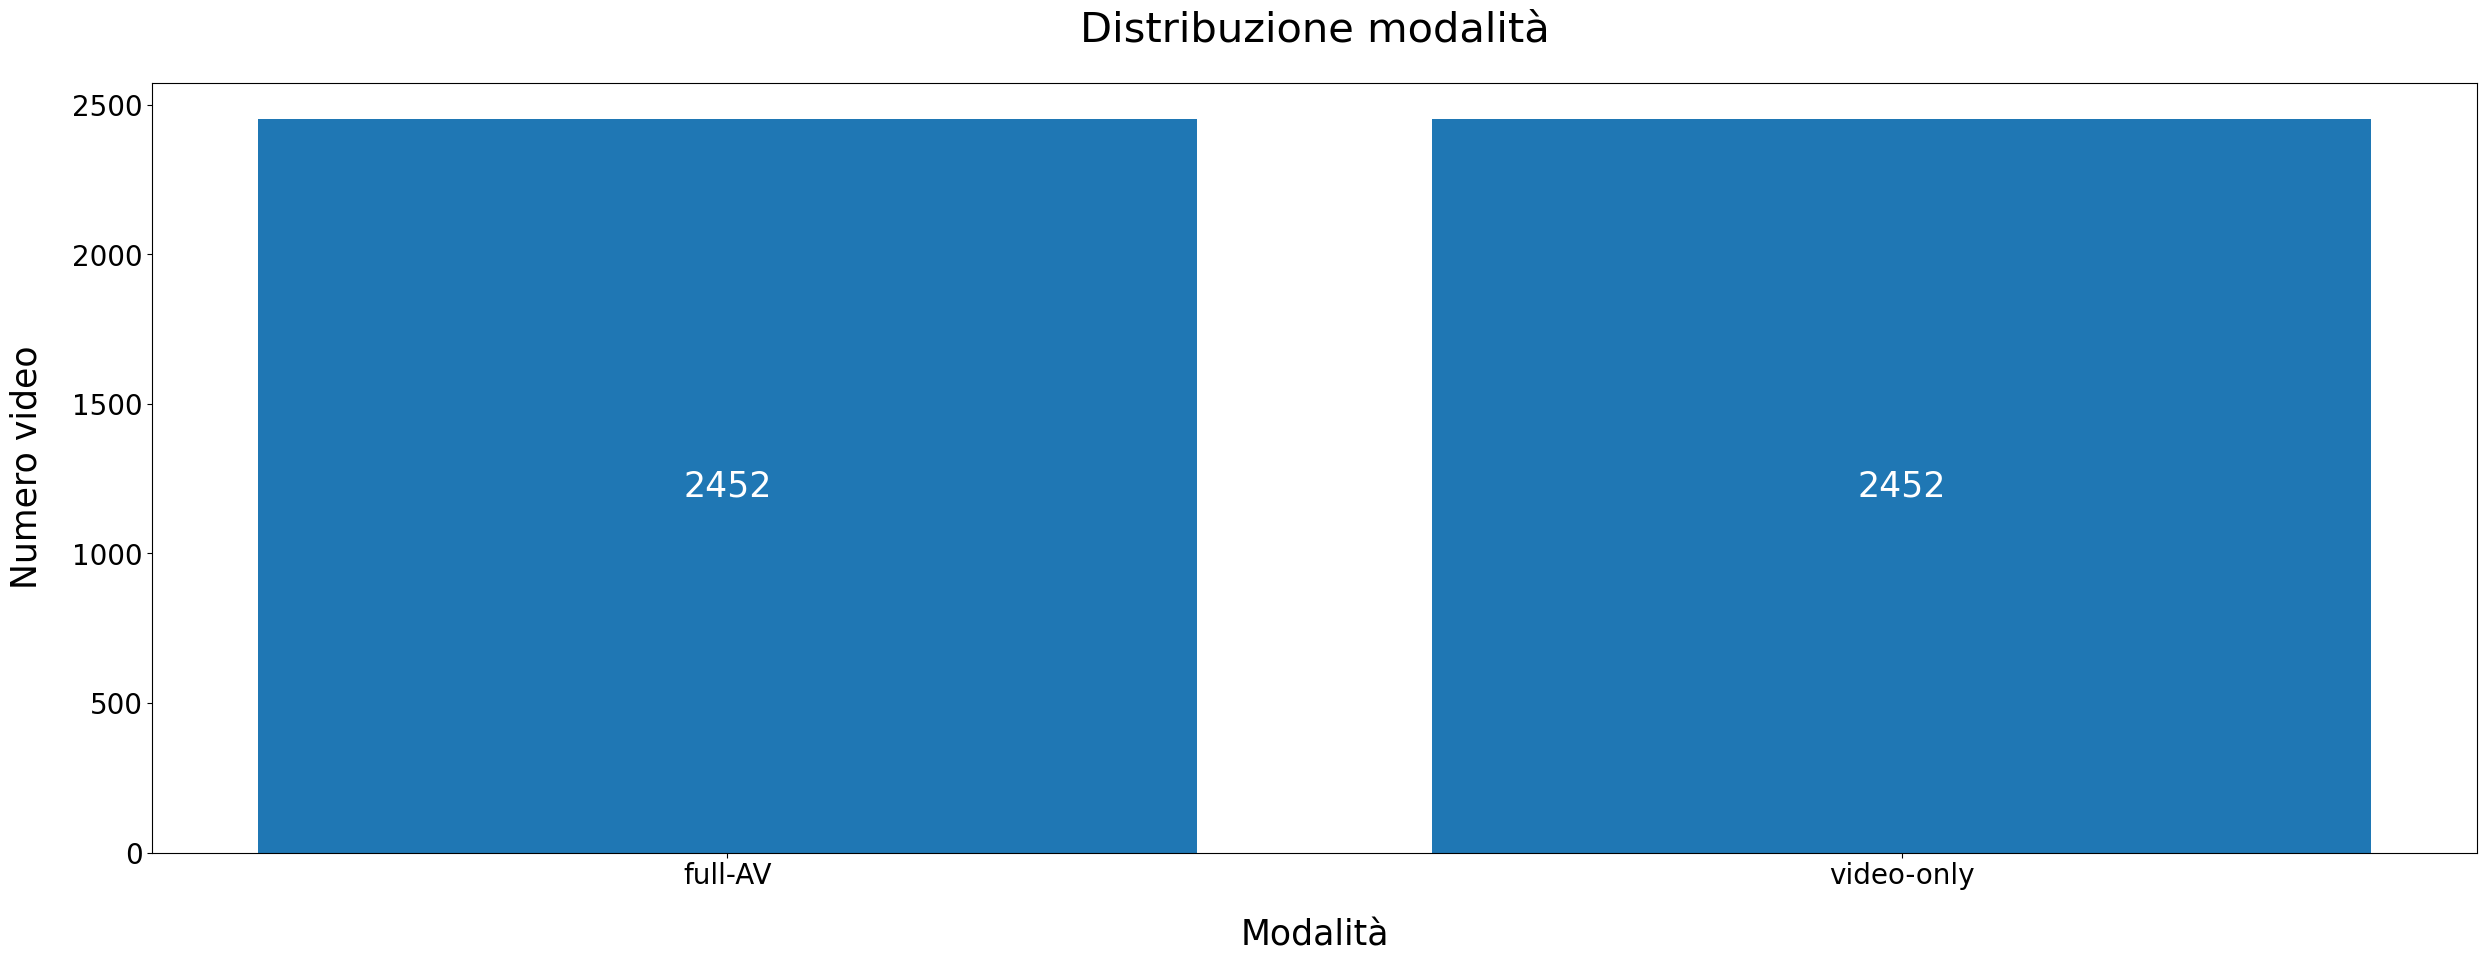

In [10]:
# Mode distribution graph
mod = ['full-AV', 'video-only']

fig = plt.figure(figsize=(30, 10))

x_mod = list(set(data_df['modality']))
y_mod = [len(data_df[data_df['modality'] == m]) for m in x_mod]

bar_plot = plt.bar(x_mod, y_mod)
plt.title('Distribuzione modalità', fontsize=30, pad=30)
plt.ylabel('Numero video', fontsize=25, labelpad=20)
plt.xlabel('Modalità', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)

plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()


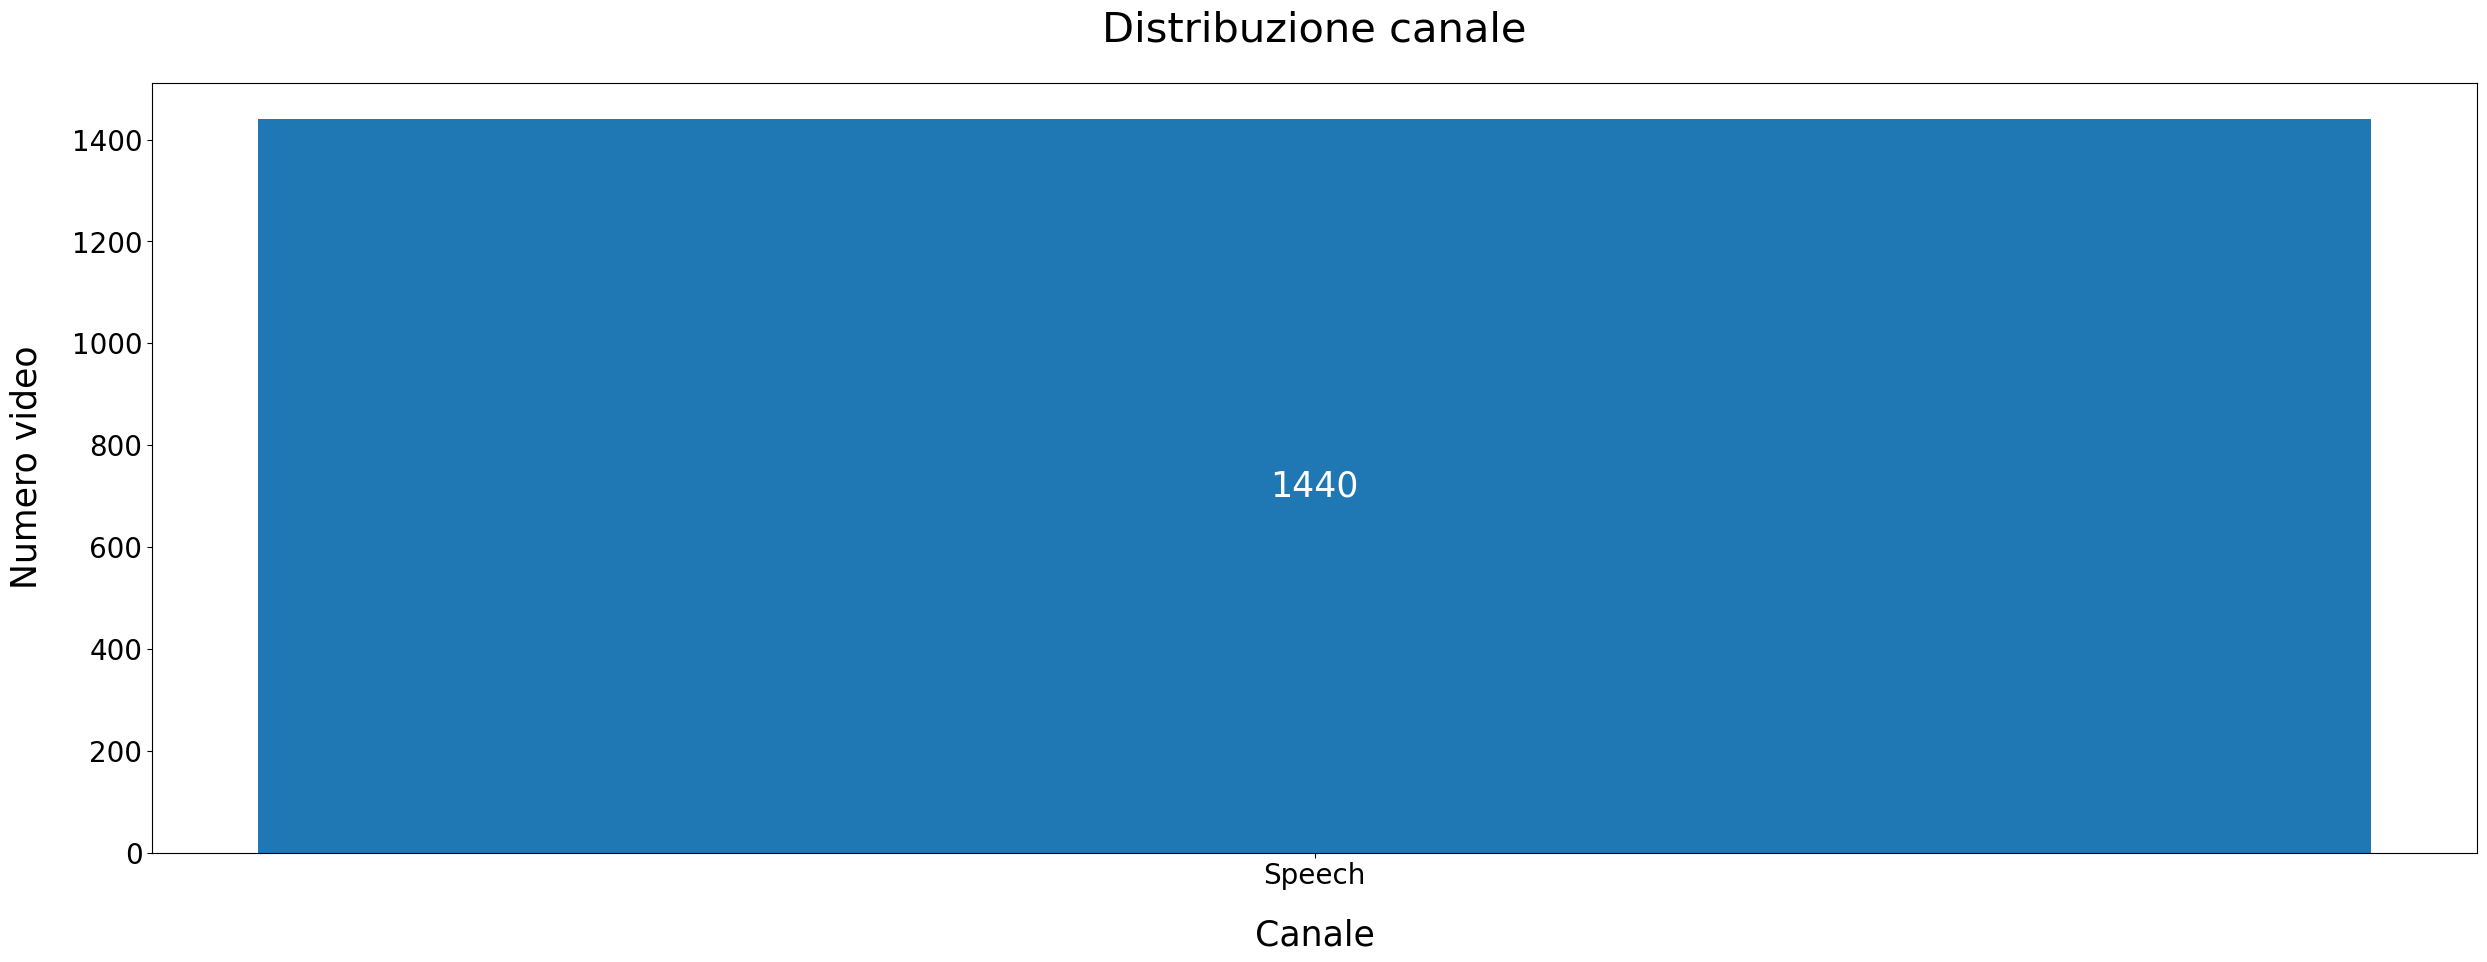

In [9]:
# Channel Distribution Graph
mod = ['Speech', 'Song']

fig = plt.figure(figsize=(30, 10))

x_mod = list(set(data_df['channel']))
y_mod = [len(data_df[data_df['channel'] == mod]) for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)
plt.title('Distribuzione canale', fontsize=30, pad=30)
plt.ylabel('Numero video', fontsize=25, labelpad=20)
plt.xlabel('Canale', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)

# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()

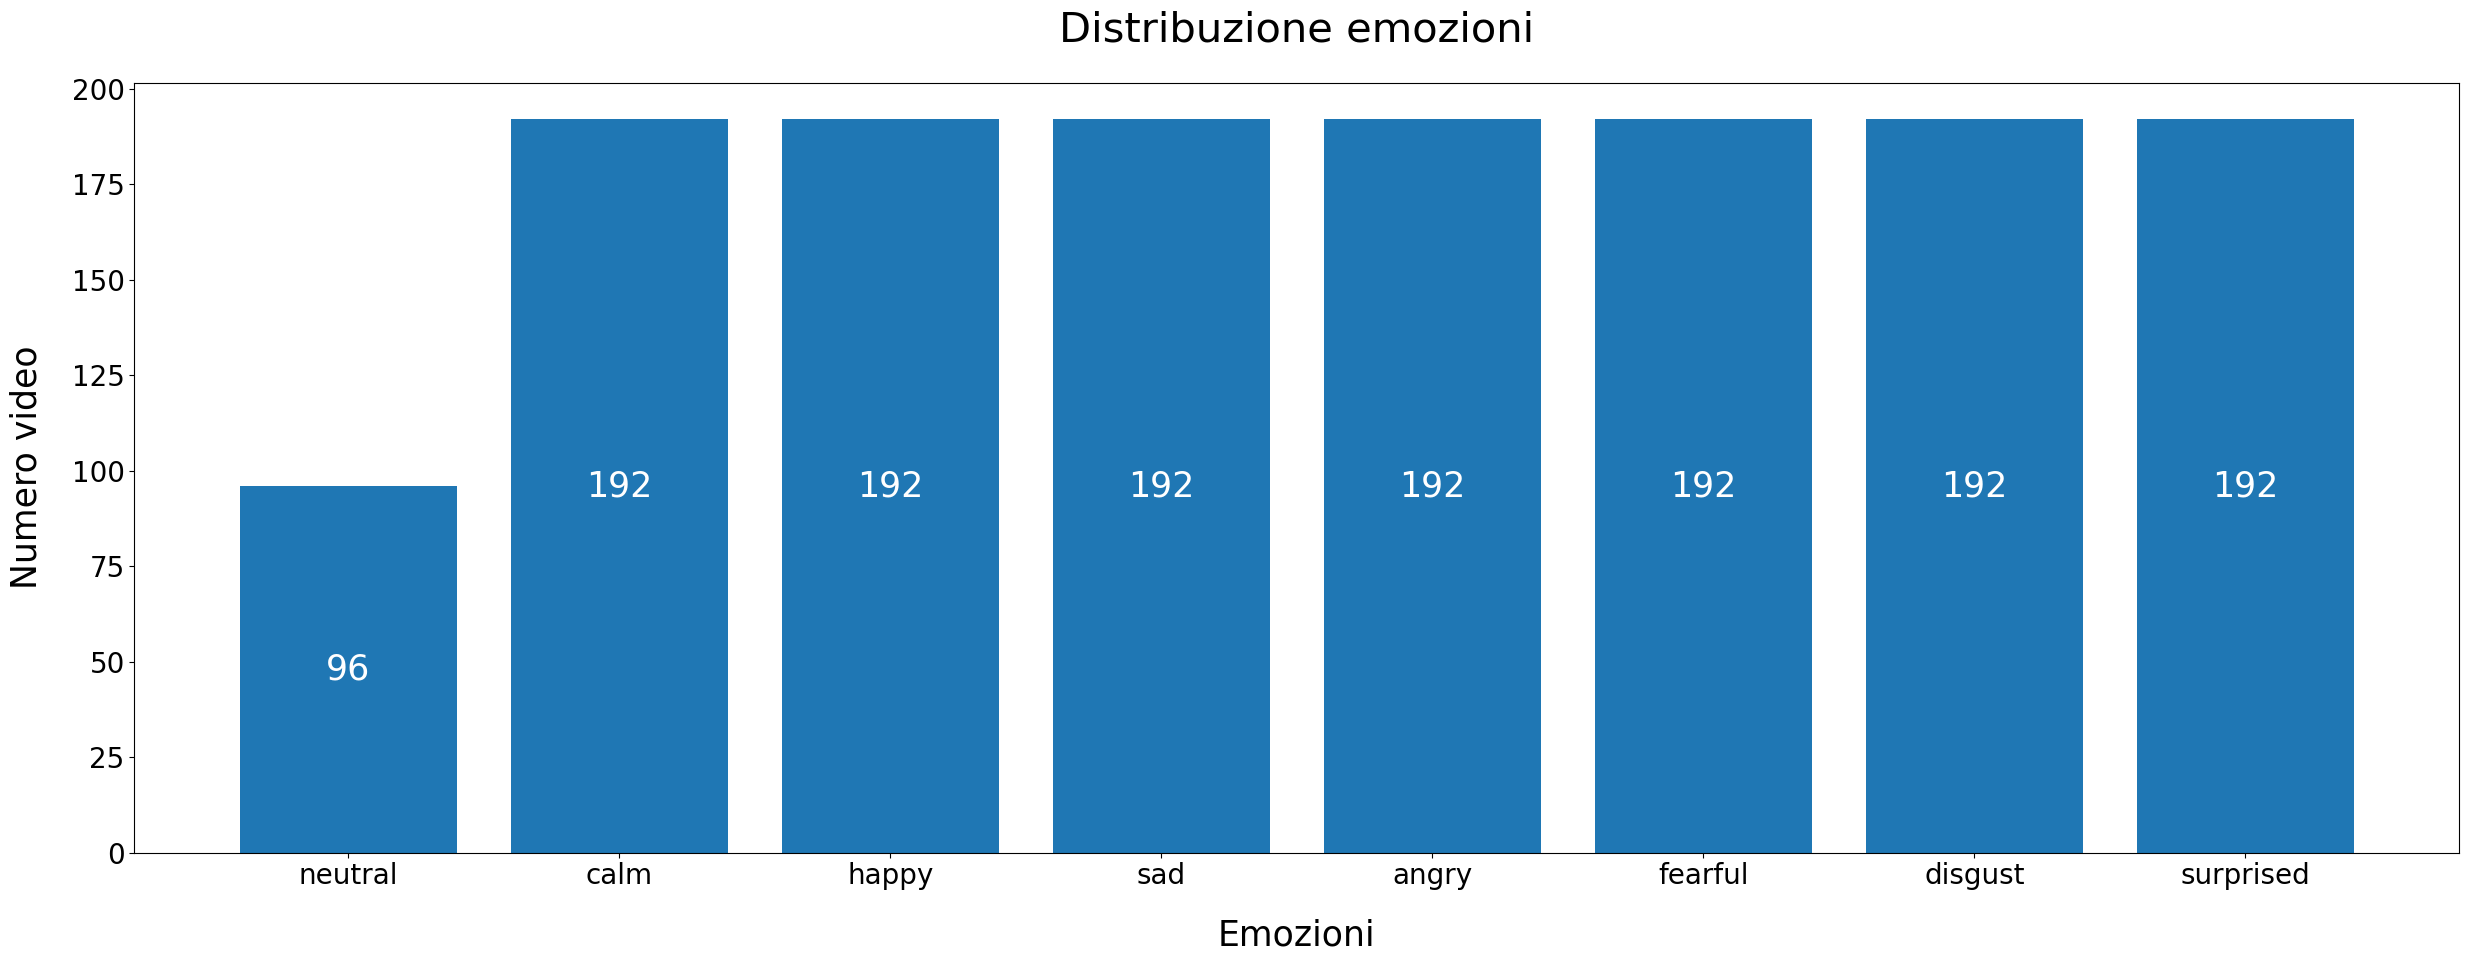

In [10]:
# Emotion Distribution Graph
mod = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful',
       'disgust', 'surprised']

fig = plt.figure(figsize=(30, 10))

x_mod = list(set(data_df['emotion']))
y_mod = [len(data_df[data_df['emotion'] == mod]) for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)
plt.title('Distribuzione emozioni', fontsize=30, pad=30)
plt.ylabel('Numero video', fontsize=25, labelpad=20)
plt.xlabel('Emozioni', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)

# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()

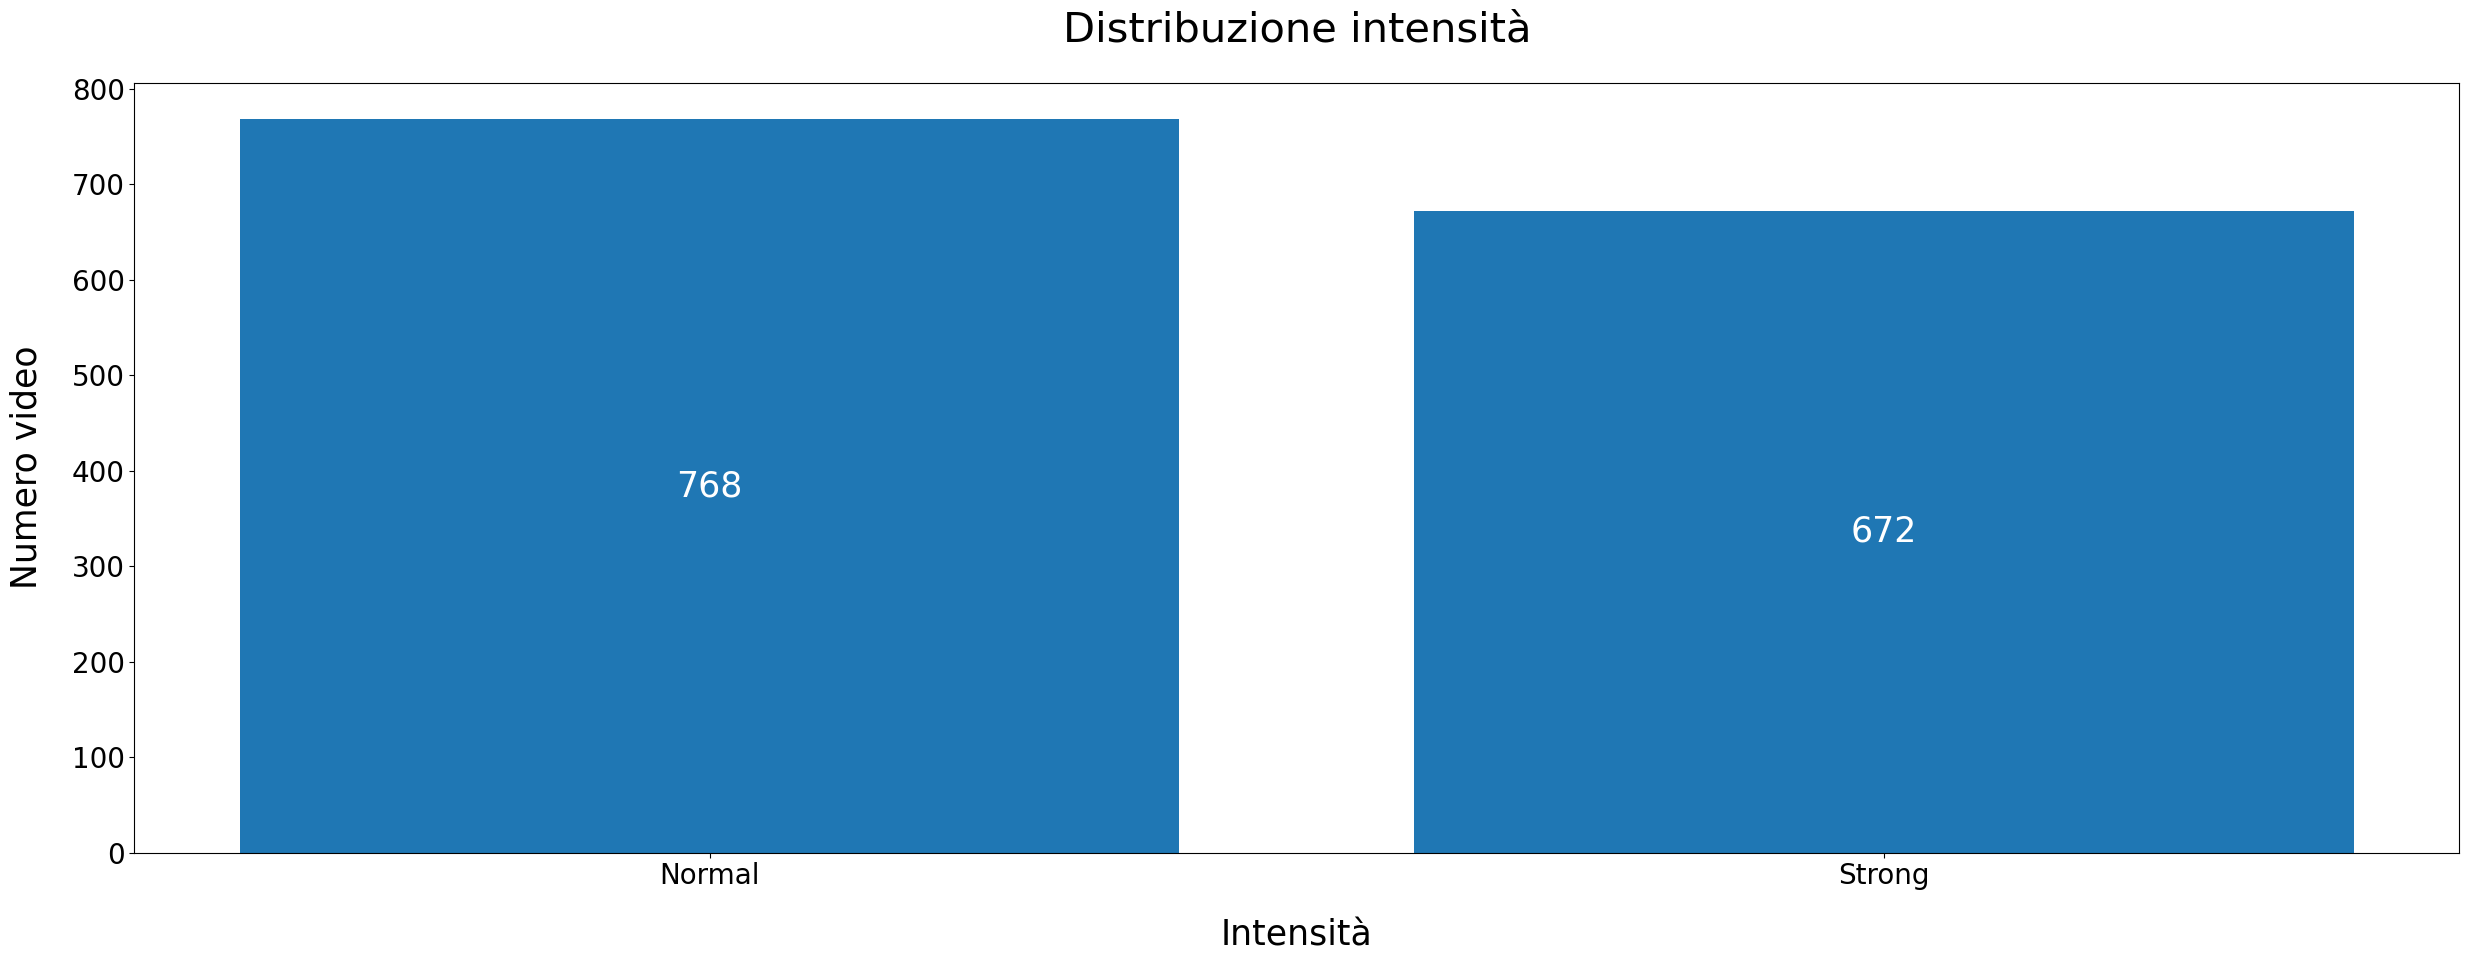

In [11]:
# Intensity Distribution Graph
mod = ['Normal', 'Strong']

fig = plt.figure(figsize=(30, 10))
x_mod = list(set(data_df['intensity']))
y_mod = [len(data_df[data_df['intensity'] == mod]) for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)

plt.title('Distribuzione intensità', fontsize=30, pad=30)
plt.ylabel('Numero video', fontsize=25, labelpad=20)
plt.xlabel('Intensità', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)

# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()

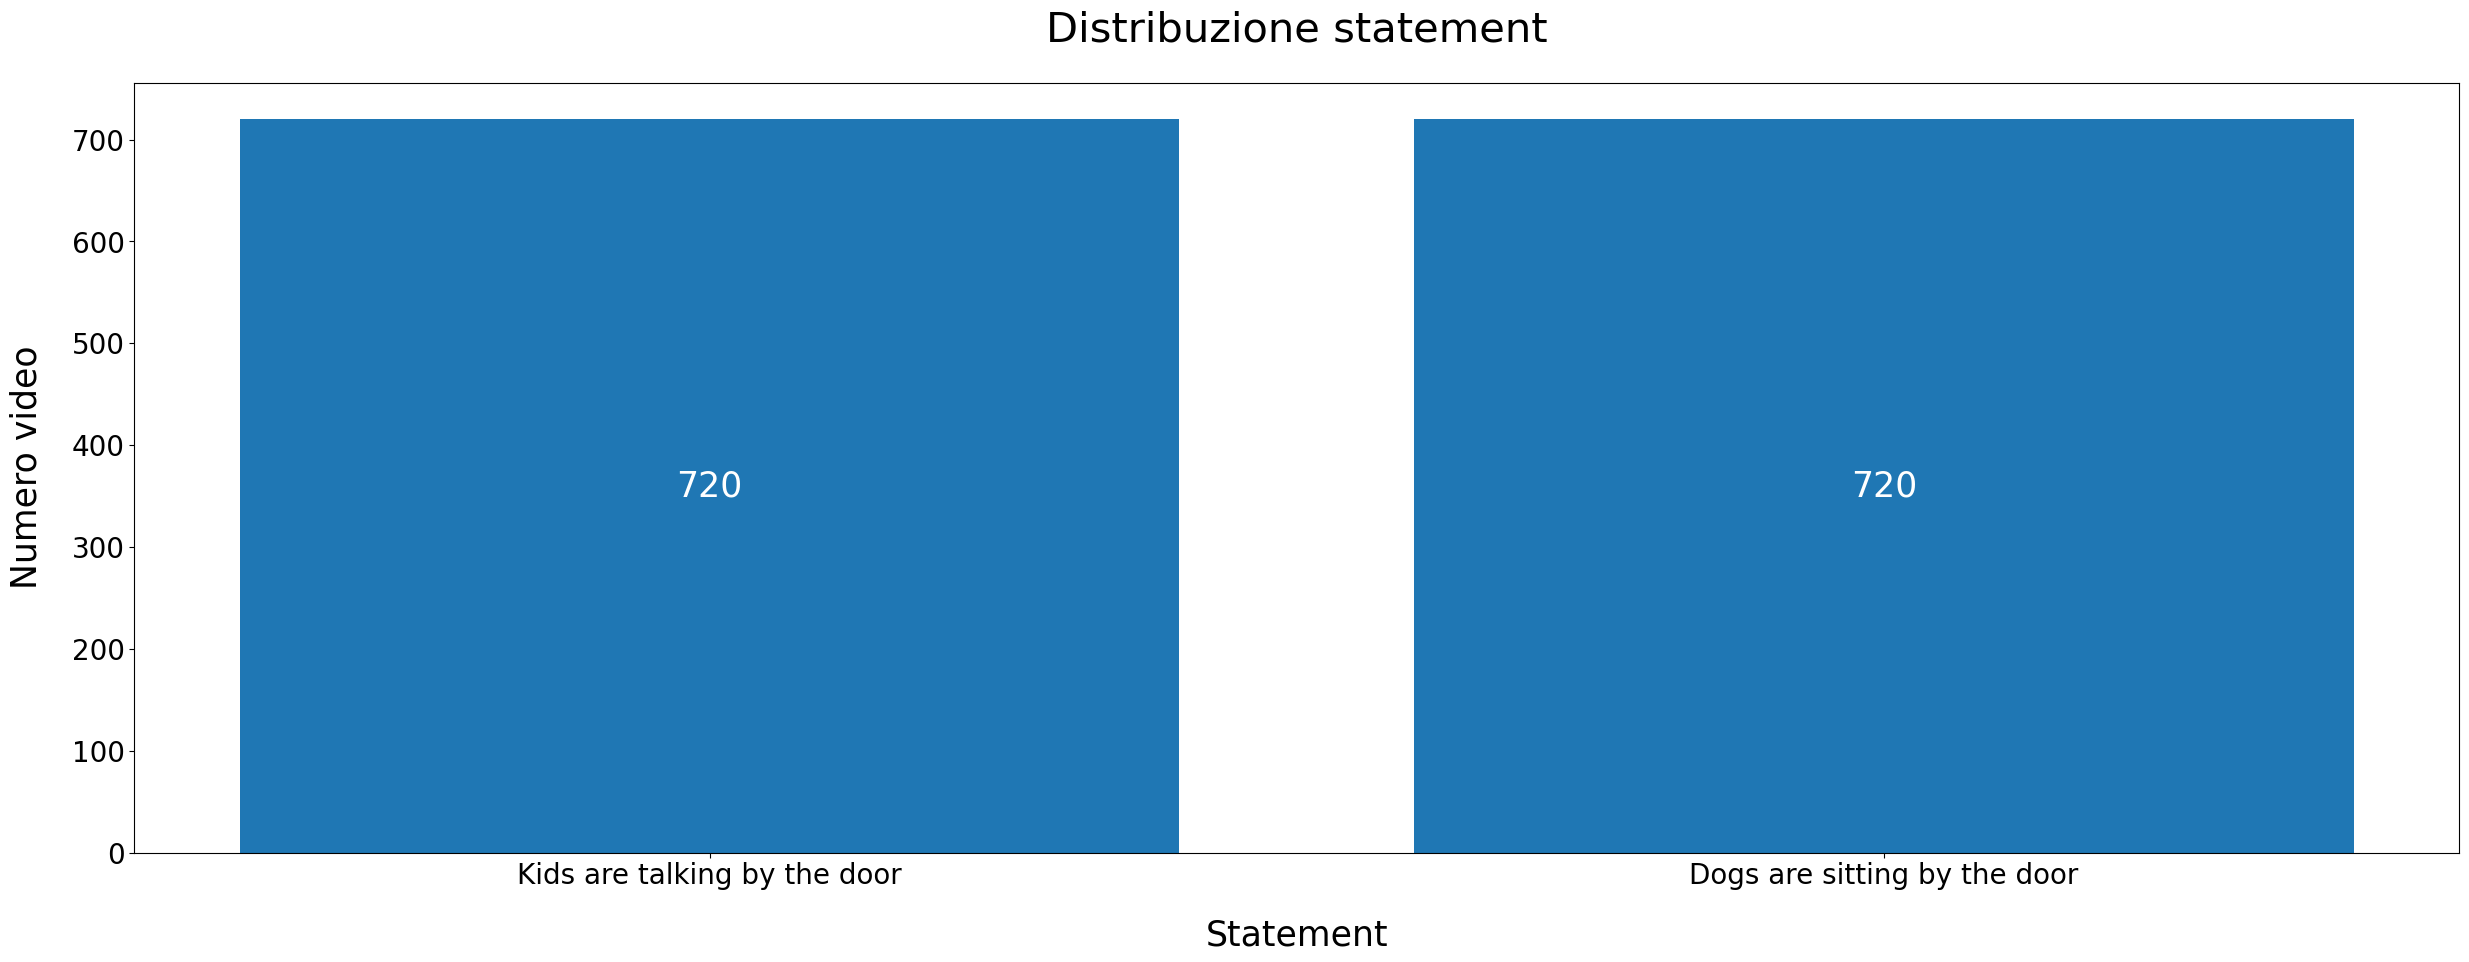

In [12]:
# Statement Distribution Graph
mod = ['Kids are talking by the door', 'Dogs are sitting by the door']

fig = plt.figure(figsize=(30, 10))

x_mod = list(set(data_df['statement']))
y_mod = [len(data_df[data_df['statement'] == mod]) for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)

plt.title('Distribuzione statement', fontsize=30, pad=30)
plt.ylabel('Numero video', fontsize=25, labelpad=20)
plt.xlabel('Statement', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)

# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()

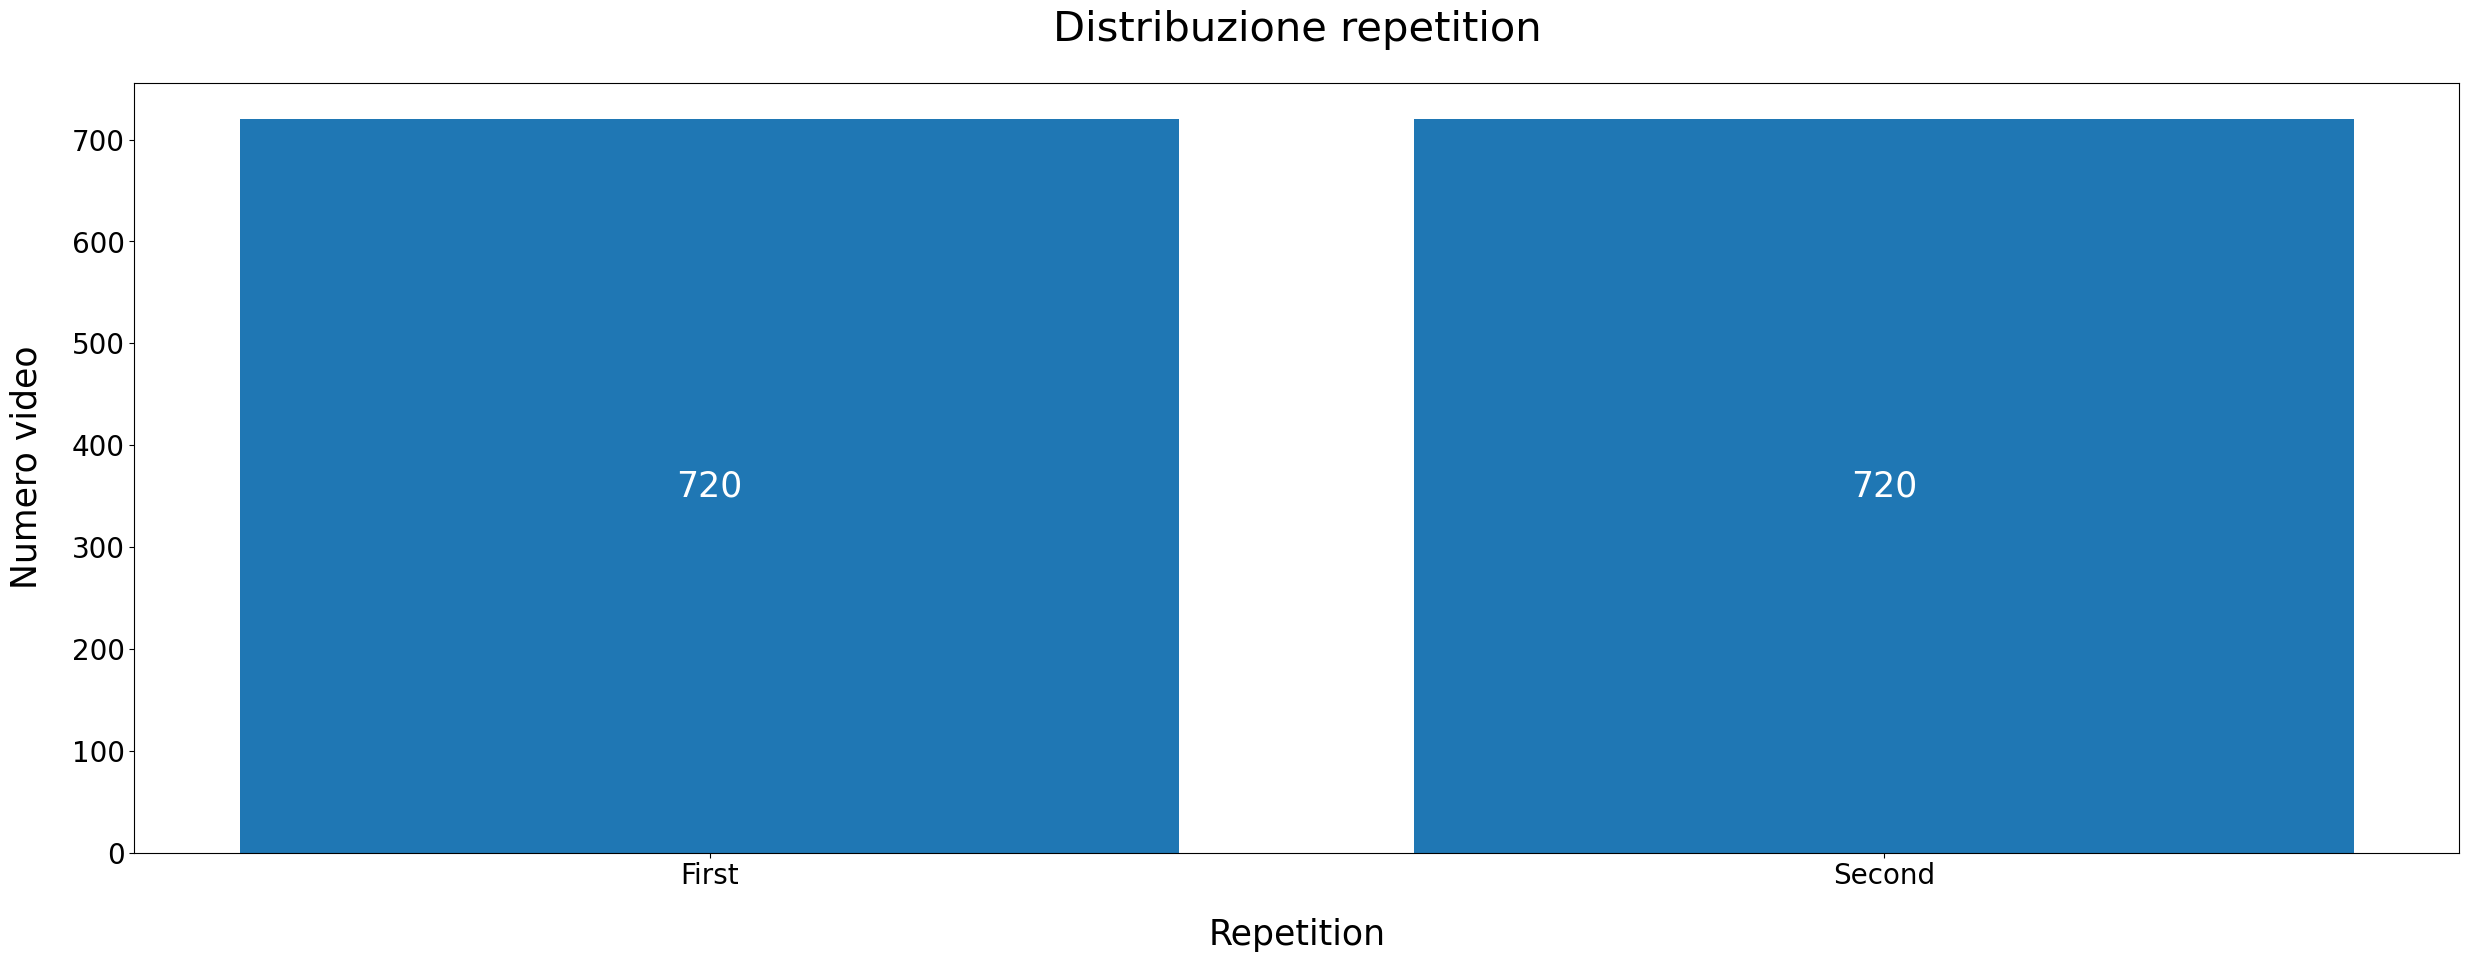

In [13]:
# Repetition Distribution Graph
mod = ['First', 'Second']

fig = plt.figure(figsize=(30, 10))

x_mod = list(set(data_df['repetition']))
y_mod = [len(data_df[data_df['repetition'] == mod]) for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)
plt.title('Distribuzione repetition', fontsize=30, pad=30)
plt.ylabel('Numero video', fontsize=25, labelpad=20)
plt.xlabel('Repetition', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)

# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()

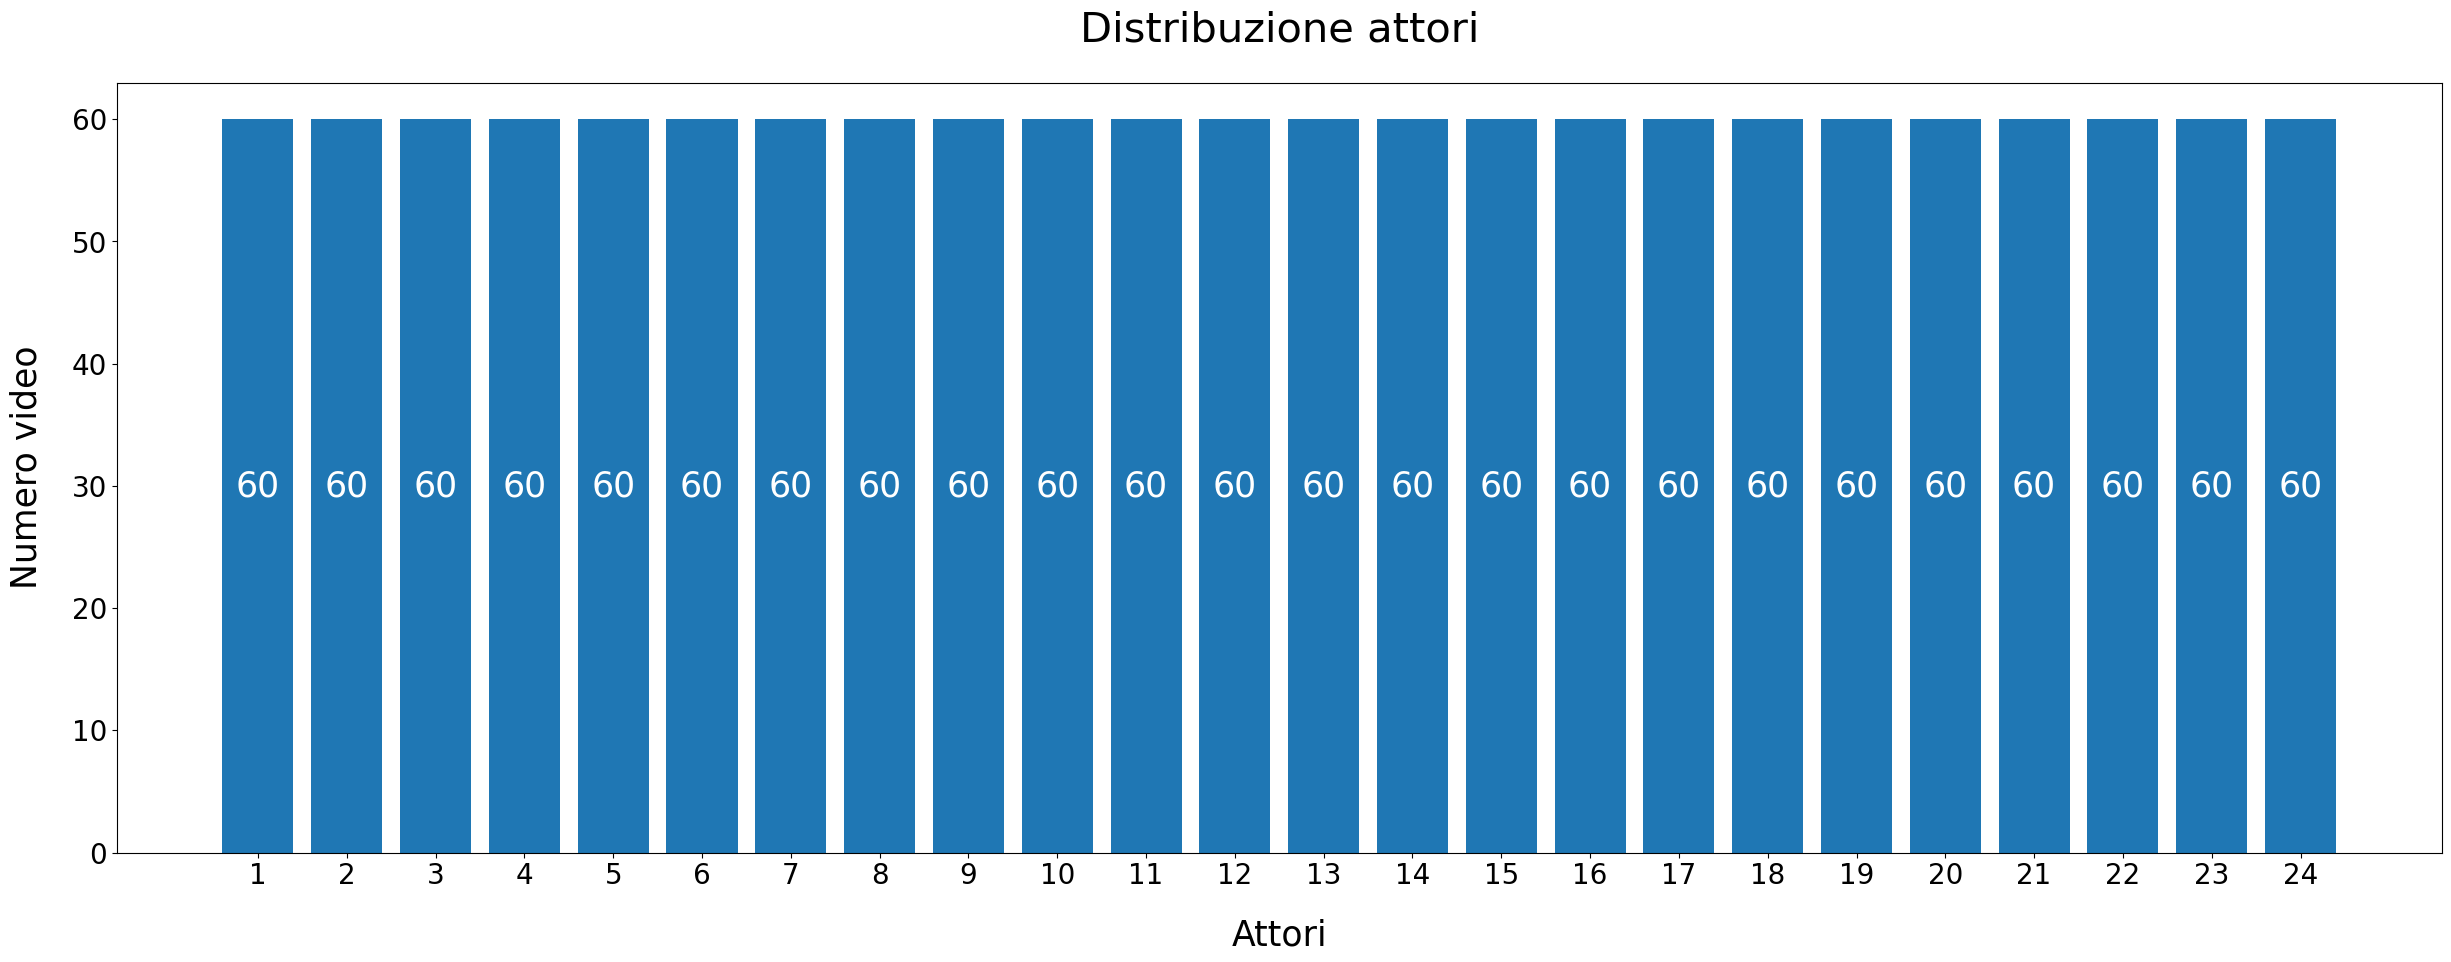

In [14]:
# Actors Distribution Graph
mod = range(1, 25)

fig = plt.figure(figsize=(30, 10))

x_mod = list(set(data_df['actor']))
y_mod = [len(data_df[data_df['actor'] == mod]) for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)
plt.title('Distribuzione attori', fontsize=30, pad=30)
plt.ylabel('Numero video', fontsize=25, labelpad=20)
plt.xlabel('Attori', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)


# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()

## Frame Dataset

In [15]:
# Read frame dataset
df_extended = pd.read_csv(Path(c.csv_path, 'dataset_extended.csv'))

In [16]:
print('Max number of frames: ', np.max(df_extended.frames))
print('Min number of frames: ', np.min(df_extended.frames))
print('Median number of frames: ', np.median(df_extended.frames))

Max number of frames:  157
Min number of frames:  87
Median number of frames:  109.0


### Number of frames per emotion

In [17]:
df_extended.head(1)

,path,filename,frames,actor,modality,channel,intensity,statement,repetition,emotion
0,Datasets\RAVDESS\Video_Speech_Actor_01\Actor_01,01-01-01-01-01-01-01.mp4,98,1,1,1,1,1,1,1


158262

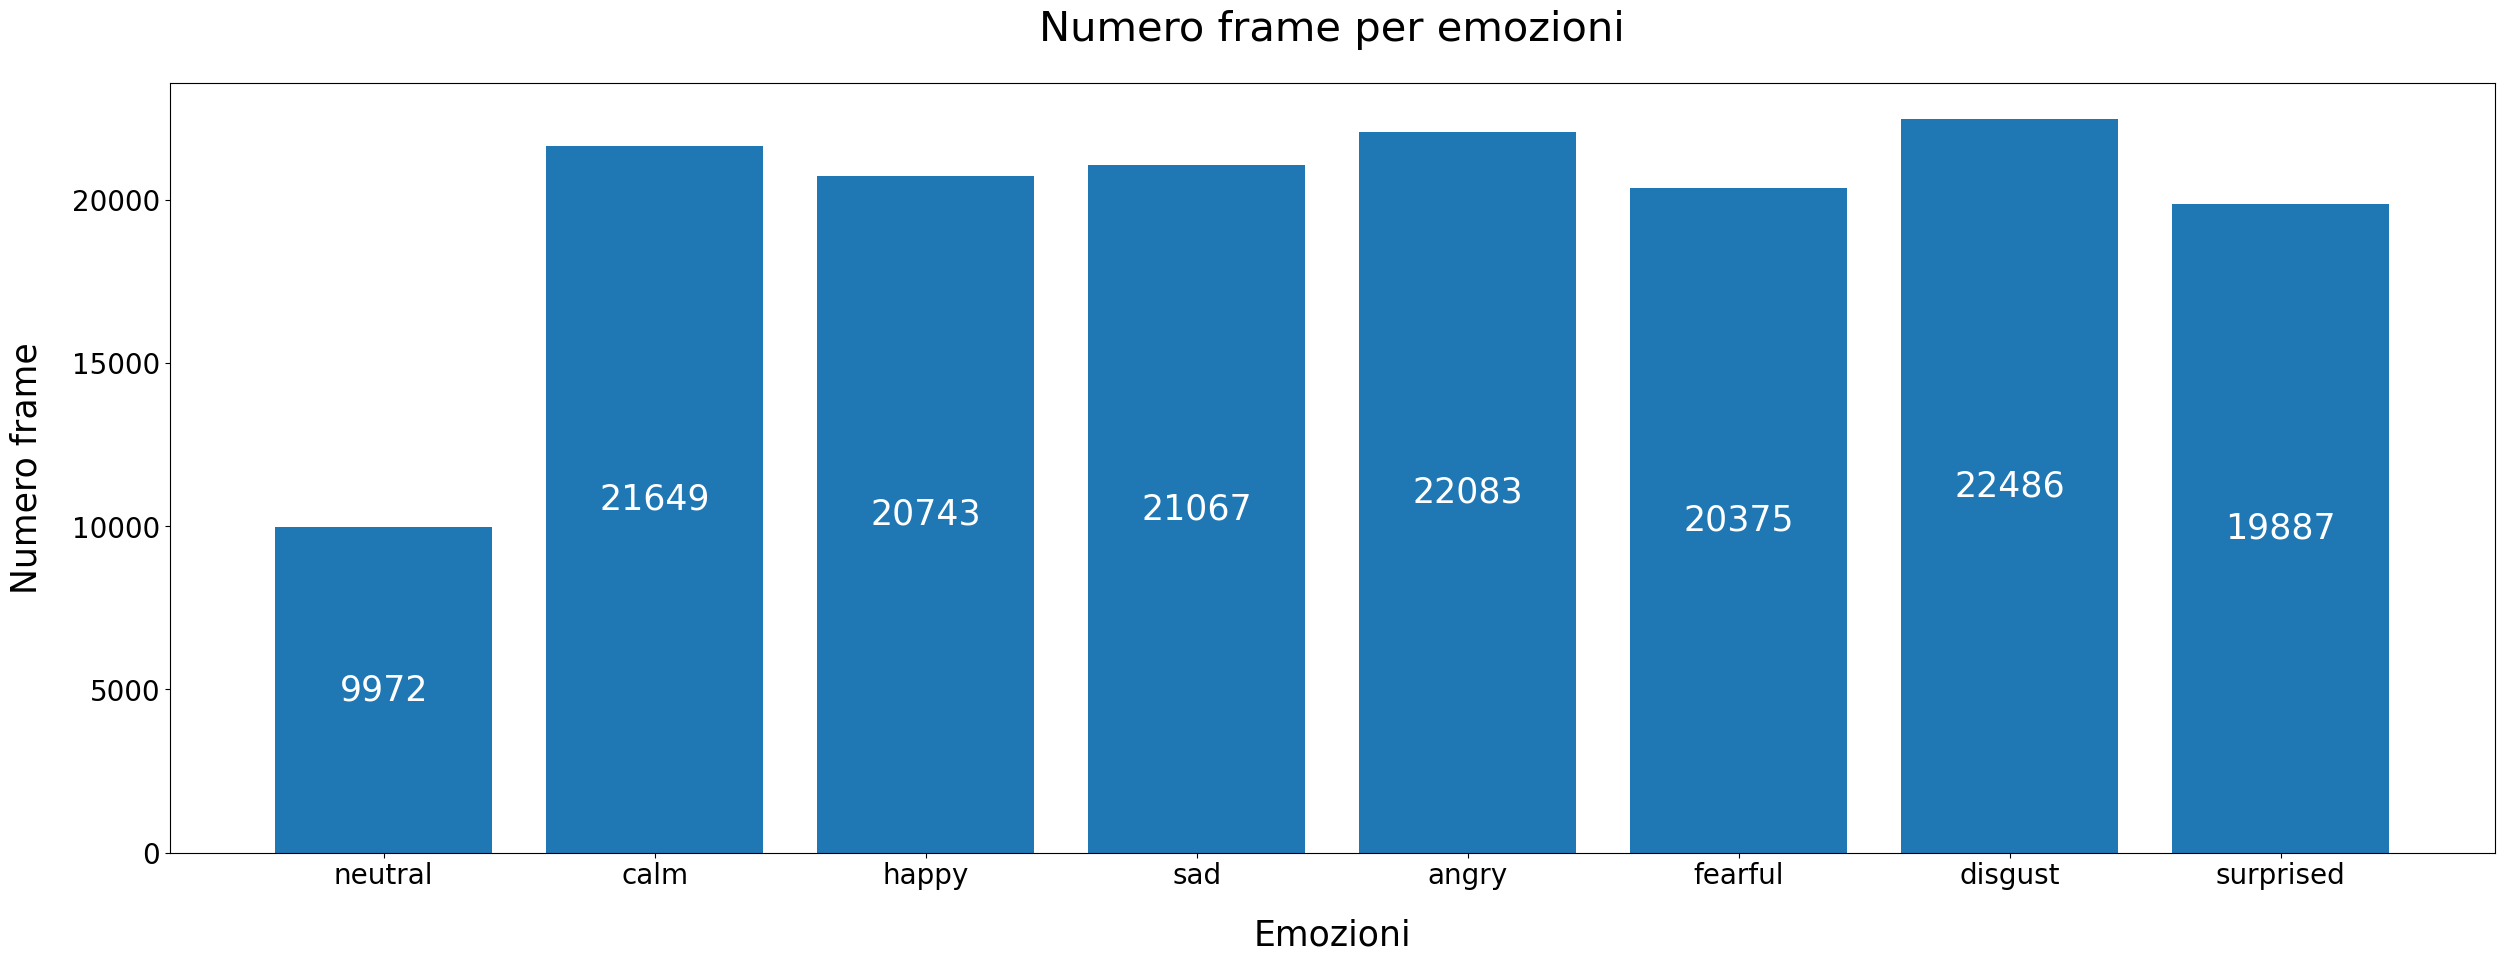

Total:  158262


In [20]:
# Frames per Emotion Distribution Graph
mod = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful',
       'disgust', 'surprised']

fig = plt.figure(figsize=(30, 10))

x_mod = list(set(df_extended['emotion']))
y_mod = [df_extended.loc[df_extended['emotion'] == mod, 'frames'].sum()
         for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)
plt.title('Numero frame per emozioni', fontsize=30, pad=30)
plt.ylabel('Numero frame', fontsize=25, labelpad=20)
plt.xlabel('Emozioni', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)

# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=25, color='white')

plt.show()

print('Total: ', df_extended['frames'].sum())

### Number of frames per actor

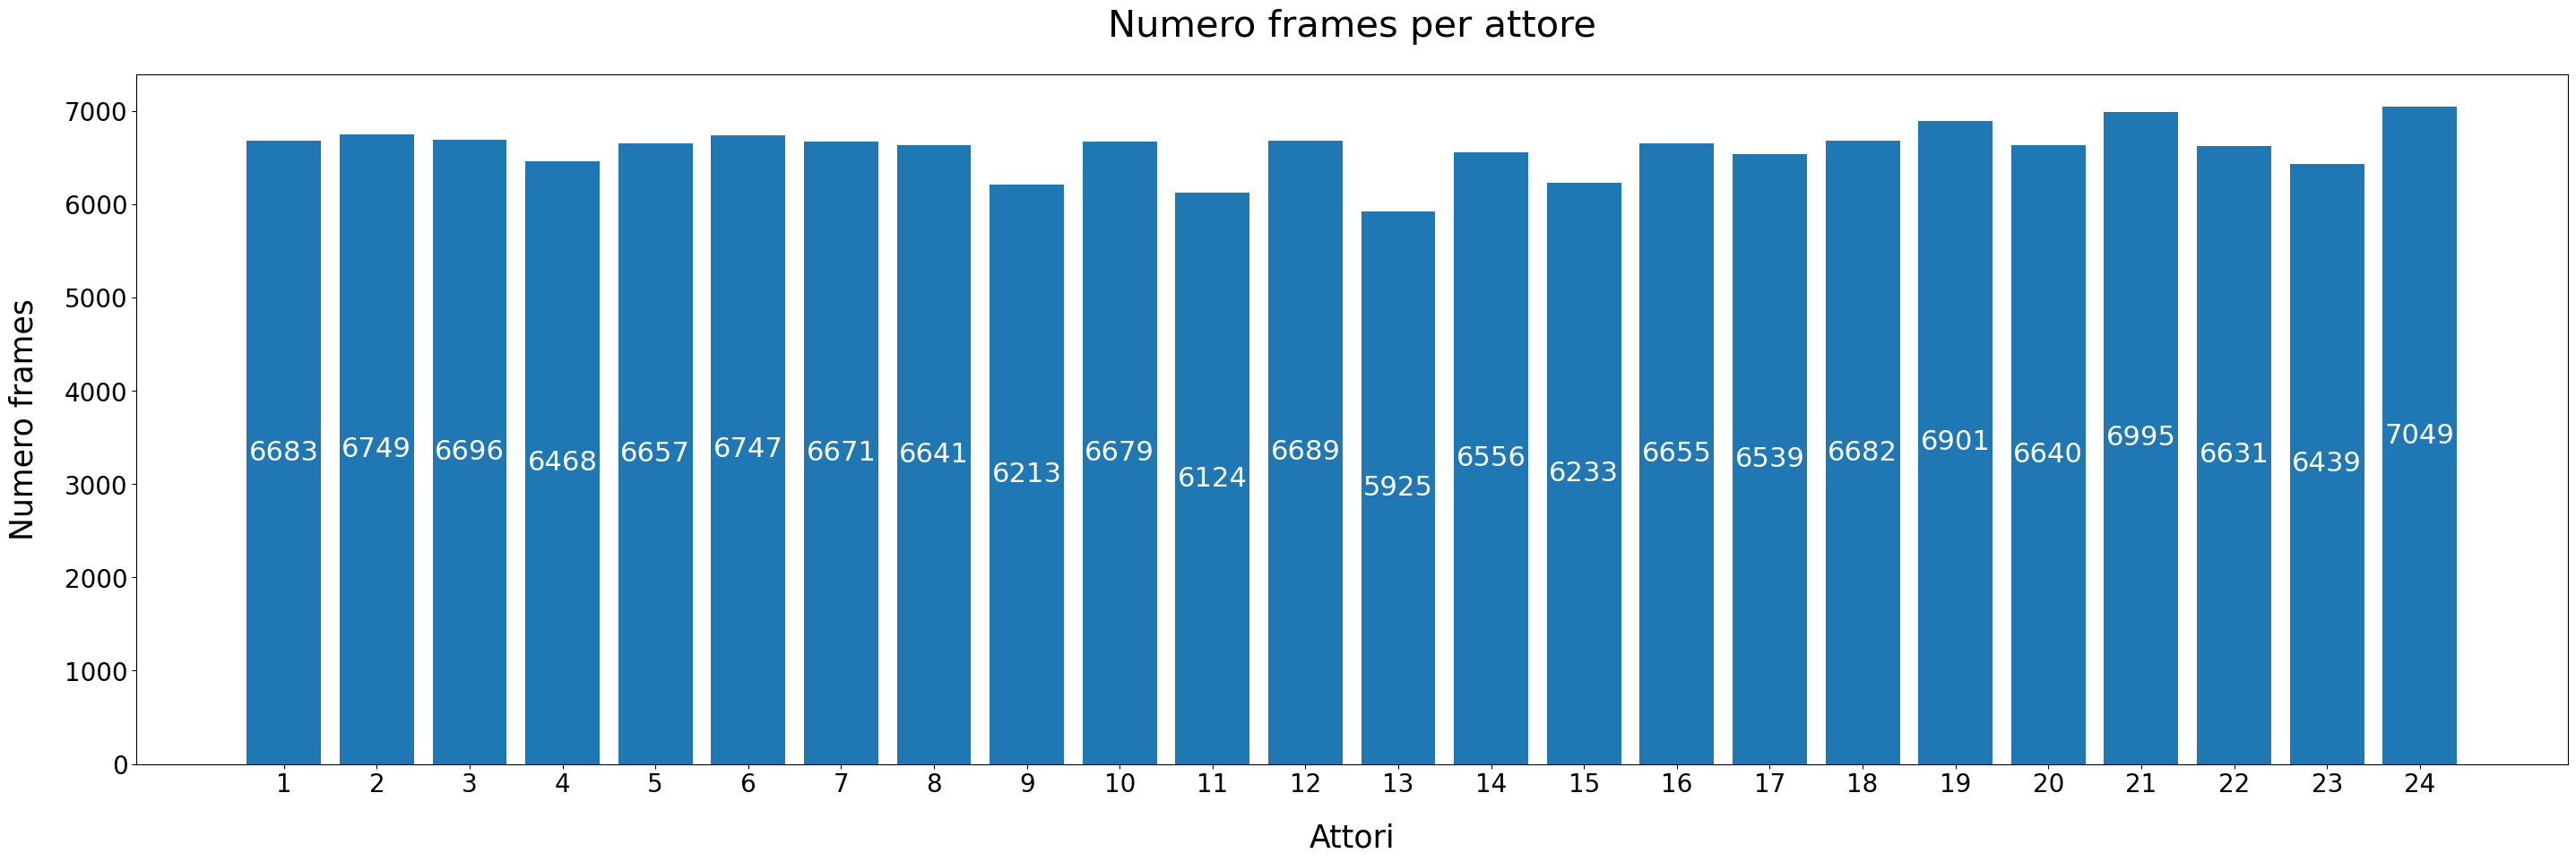

In [21]:
# Frames per Actor Distribution Graph
mod = range(1, 25)

fig = plt.figure(figsize=(35, 10))

x_mod = list(set(df_extended['actor']))
y_mod = [df_extended.loc[df_extended['actor'] == mod, 'frames'].sum()
         for mod in x_mod]

bar_plot = plt.bar(x_mod, y_mod)
plt.title('Numero frames per attore', fontsize=30, pad=30)
plt.ylabel('Numero frames', fontsize=25, labelpad=20)
plt.xlabel('Attori', fontsize=25, labelpad=20)
plt.xticks(
    np.arange(1, len(x_mod)+1), [mod[idx] for idx, x in enumerate(x_mod)],
    fontsize=20
)
plt.yticks(fontsize=20)


# Write numbers on the bars
plt.bar_label(bar_plot, label_type='center', fontsize=22, color='white')

plt.show()

## Video Test

In [66]:
test_video = df_extended.iloc[0]
test_video_fullpath = Path(test_video.path, test_video.filename)
vidcap = cv2.VideoCapture(str(test_video_fullpath))

In [73]:
utils.video_info(vidcap)


    Frame Width: 1280
    Frame Height: 720
    Frame Rate: 29.97
    # Current position of video  (ms): 0
    Numbers of frame: 99
    


In [77]:
ipd.Video(test_video_fullpath, width=300)